<a href="https://colab.research.google.com/github/VeronikaShe/ML-study_HW_1/blob/main/HW_4_Log_manual_SHEMYAKINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Пункт 1

- Загружаем данные.

- Используем датасет с ирисами. Оставляем только 2 класса: Iris Versicolor, Iris Virginica.


In [2]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [98]:
# датасет
X = iris.data[50:,1:3] # забираем данные из датасета
y = iris.target[50:]
X,y

(array([[3.2, 4.7],
        [3.2, 4.5],
        [3.1, 4.9],
        [2.3, 4. ],
        [2.8, 4.6],
        [2.8, 4.5],
        [3.3, 4.7],
        [2.4, 3.3],
        [2.9, 4.6],
        [2.7, 3.9],
        [2. , 3.5],
        [3. , 4.2],
        [2.2, 4. ],
        [2.9, 4.7],
        [2.9, 3.6],
        [3.1, 4.4],
        [3. , 4.5],
        [2.7, 4.1],
        [2.2, 4.5],
        [2.5, 3.9],
        [3.2, 4.8],
        [2.8, 4. ],
        [2.5, 4.9],
        [2.8, 4.7],
        [2.9, 4.3],
        [3. , 4.4],
        [2.8, 4.8],
        [3. , 5. ],
        [2.9, 4.5],
        [2.6, 3.5],
        [2.4, 3.8],
        [2.4, 3.7],
        [2.7, 3.9],
        [2.7, 5.1],
        [3. , 4.5],
        [3.4, 4.5],
        [3.1, 4.7],
        [2.3, 4.4],
        [3. , 4.1],
        [2.5, 4. ],
        [2.6, 4.4],
        [3. , 4.6],
        [2.6, 4. ],
        [2.3, 3.3],
        [2.7, 4.2],
        [3. , 4.2],
        [2.9, 4.2],
        [2.9, 4.3],
        [2.5, 3. ],
        [2.8, 4.1],


In [96]:
y = np.where(y == 2, 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [99]:
X = np.c_[np.ones(len(X)), X]
X

array([[1. , 3.2, 4.7],
       [1. , 3.2, 4.5],
       [1. , 3.1, 4.9],
       [1. , 2.3, 4. ],
       [1. , 2.8, 4.6],
       [1. , 2.8, 4.5],
       [1. , 3.3, 4.7],
       [1. , 2.4, 3.3],
       [1. , 2.9, 4.6],
       [1. , 2.7, 3.9],
       [1. , 2. , 3.5],
       [1. , 3. , 4.2],
       [1. , 2.2, 4. ],
       [1. , 2.9, 4.7],
       [1. , 2.9, 3.6],
       [1. , 3.1, 4.4],
       [1. , 3. , 4.5],
       [1. , 2.7, 4.1],
       [1. , 2.2, 4.5],
       [1. , 2.5, 3.9],
       [1. , 3.2, 4.8],
       [1. , 2.8, 4. ],
       [1. , 2.5, 4.9],
       [1. , 2.8, 4.7],
       [1. , 2.9, 4.3],
       [1. , 3. , 4.4],
       [1. , 2.8, 4.8],
       [1. , 3. , 5. ],
       [1. , 2.9, 4.5],
       [1. , 2.6, 3.5],
       [1. , 2.4, 3.8],
       [1. , 2.4, 3.7],
       [1. , 2.7, 3.9],
       [1. , 2.7, 5.1],
       [1. , 3. , 4.5],
       [1. , 3.4, 4.5],
       [1. , 3.1, 4.7],
       [1. , 2.3, 4.4],
       [1. , 3. , 4.1],
       [1. , 2.5, 4. ],
       [1. , 2.6, 4.4],
       [1. , 3. 

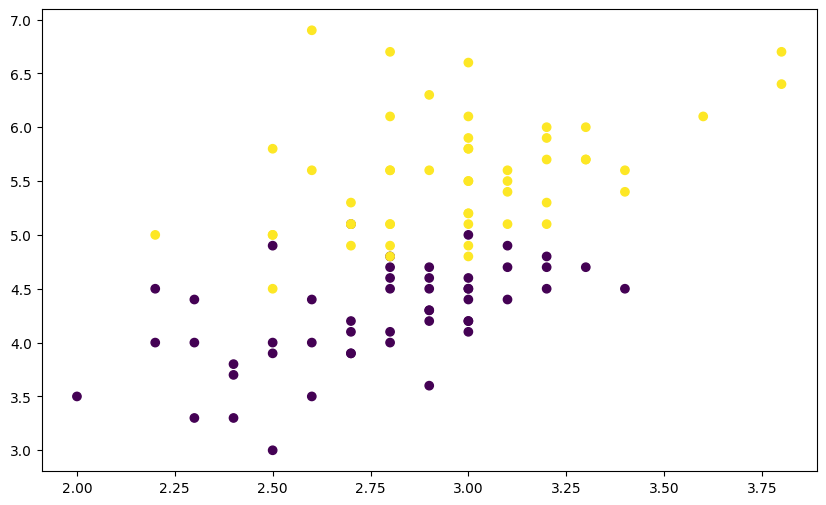

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 2], c=y);

Реализуем функцию:

logloss - функция логистической функции потерь (cross entropy)  logloss=−1n∑(yi⋅log(pi)+(1−yi)⋅log(1−pi))
gr_logloss - градиент функции logloss записанные в матричном виде.  XT(σ(XW)−Y)

In [76]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [101]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]


In [102]:
def visualize(W):
    x_t_ones = np.c_[np.ones(x_t.shape[0]), x_t]

    y_proba = sigmoid(x_t_ones @ W)
    Z = np.where(y_proba >= 0.5, 1, 0)

    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(8,8))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], edgecolors='k')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

Итерация: 0
[ 0.44122749 -0.33087015  2.43077119]
[ 0.44622801 -0.3159988   2.45853314]
Logloss 4.342935726613279e-05
Accuracy 0.5
--------------------------------------------------------


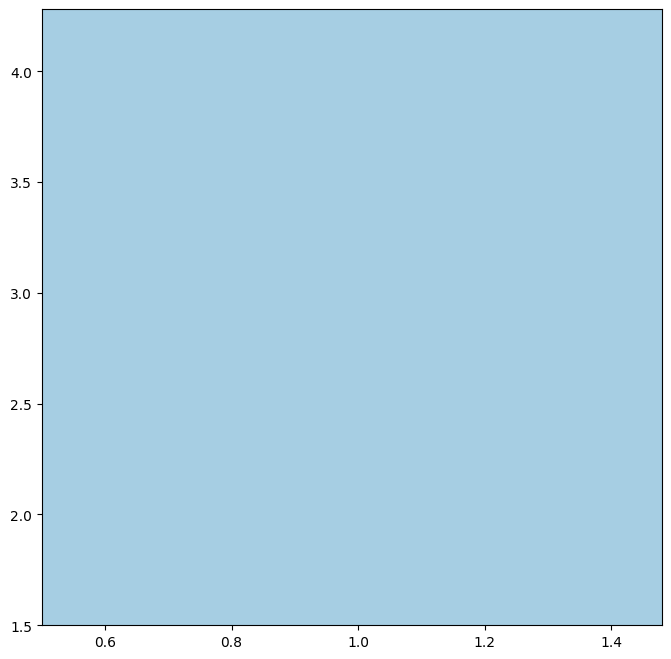

Итерация: 70
[0.79126418 0.71012462 4.37410768]
[0.7962647  0.72499598 4.40186963]
Logloss 2.9337195428657285e-09
Accuracy 0.5
--------------------------------------------------------


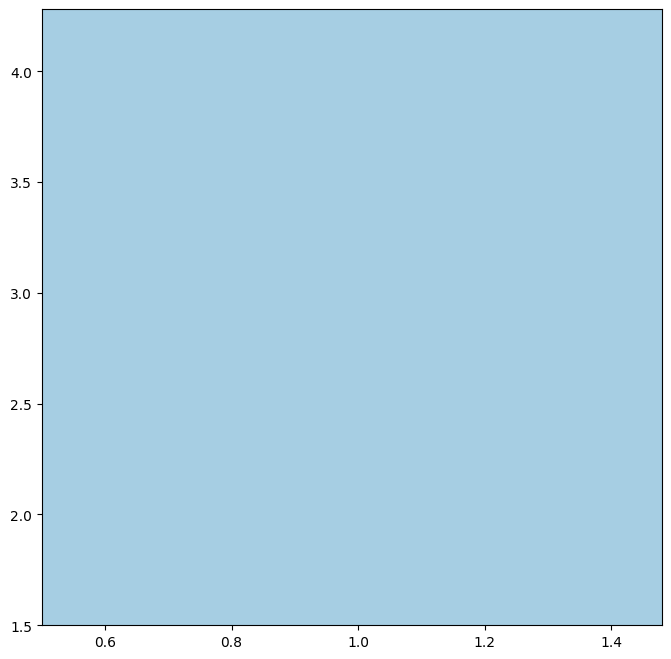

Итерация: 140
[1.14130087 1.7511194  6.31744417]
[1.1463014  1.76599076 6.34520612]
Logloss 3.284195138088169e-13
Accuracy 0.5
--------------------------------------------------------


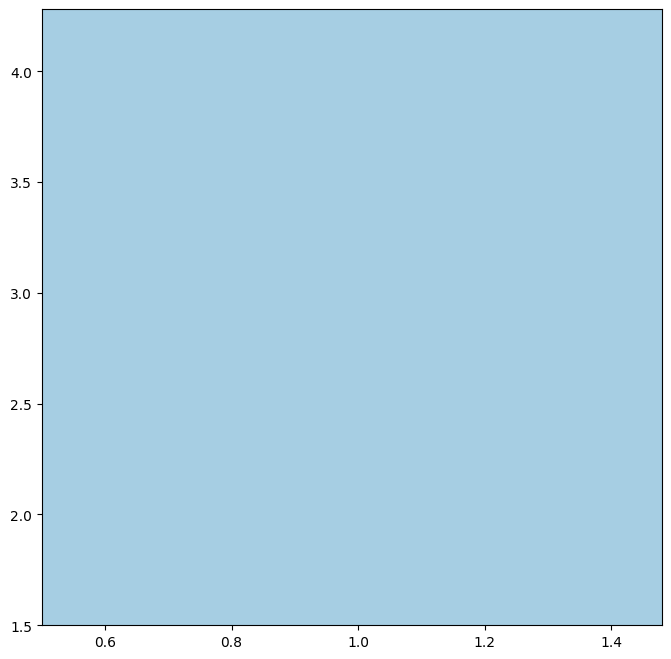

Итерация: 210
[1.49133757 2.79211418 8.26078066]
[1.49633809 2.80698553 8.28854261]
Logloss 4.2188474935756e-17
Accuracy 0.5
--------------------------------------------------------


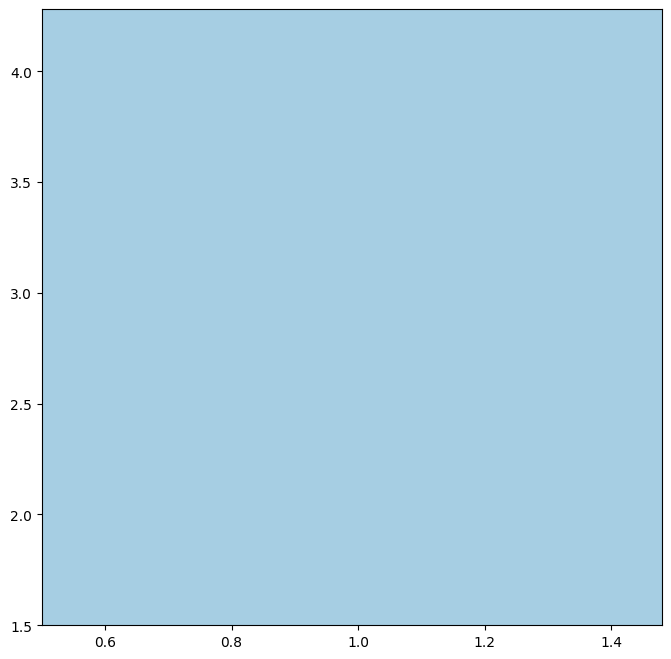

Итерация: 280
[ 1.84137426  3.83310895 10.20411716]
[ 1.84637478  3.84798031 10.23187911]
Logloss -0.0
Accuracy 0.5
--------------------------------------------------------


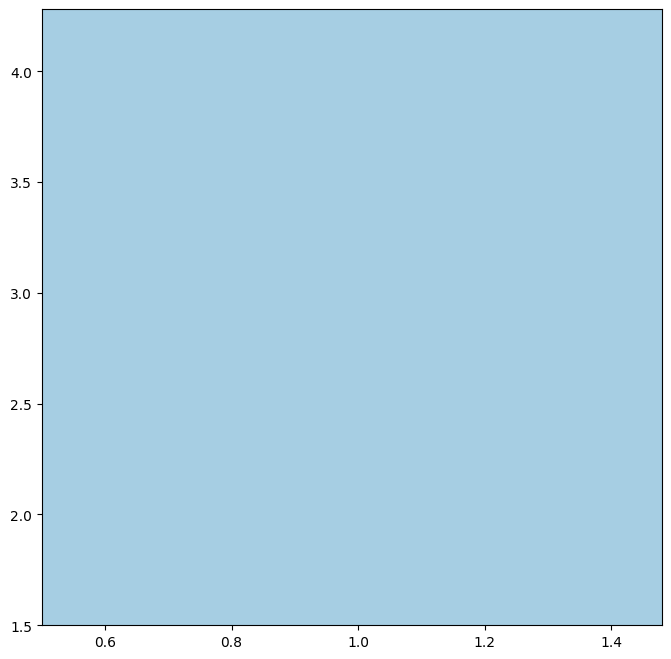

Итерация: 350
[ 2.19141095  4.87410373 12.14745365]
[ 2.19641148  4.88897508 12.1752156 ]
Logloss -0.0
Accuracy 0.5
--------------------------------------------------------


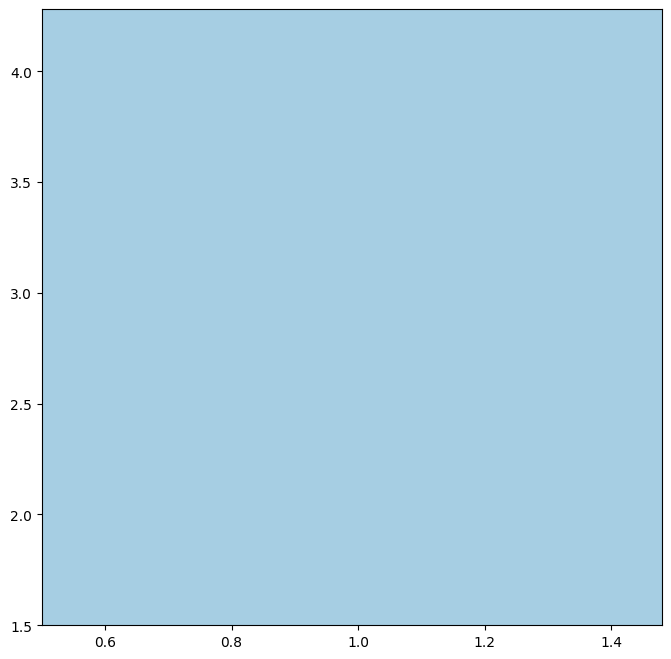

Итерация: 420
[ 2.54144764  5.91509851 14.09079014]
[ 2.54644817  5.92996986 14.11855209]
Logloss -0.0
Accuracy 0.5
--------------------------------------------------------


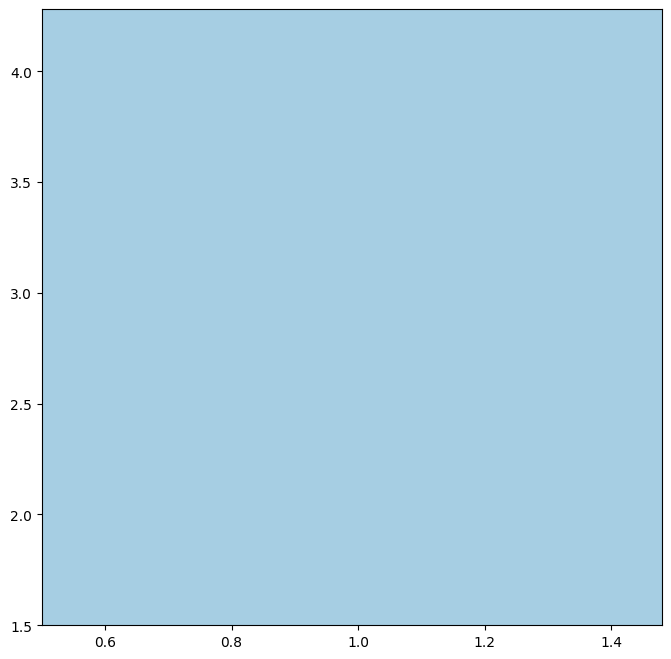

Итерация: 490
[ 2.89148434  6.95609328 16.03412663]
[ 2.89648486  6.97096464 16.06188858]
Logloss -0.0
Accuracy 0.5
--------------------------------------------------------


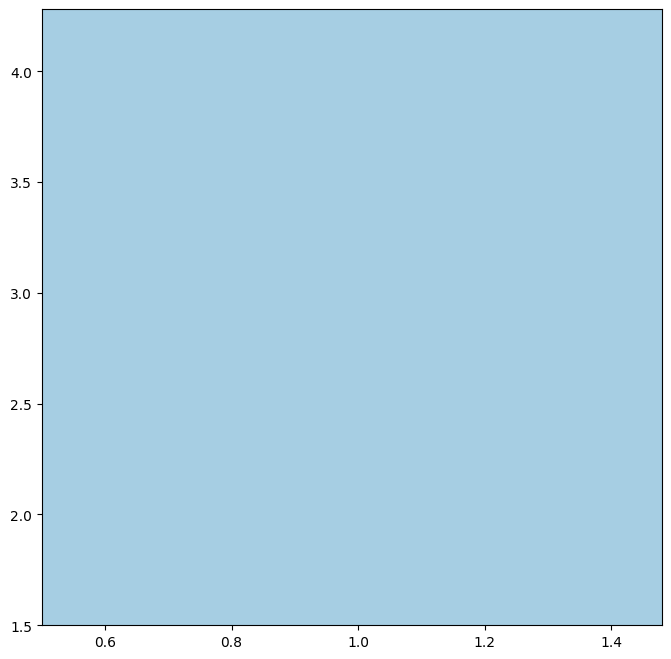

In [103]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
np.random.seed(5)
W = np.random.randn(X.shape[1])

# размер шага (learning rate)
learning_rate = 0.0001

next_W = W

# количество итерация
n = 500
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 70 == 0:
        print(f"Итерация: {i}")
        # print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print (cur_W)
        print (next_W)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

        visualize(next_W)

In [40]:

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=500)

In [54]:
y = pd.Series(data = np.ravel(y))
X,y

(array([[1. , 3.2, 4.7],
        [1. , 3.2, 4.5],
        [1. , 3.1, 4.9],
        [1. , 2.3, 4. ],
        [1. , 2.8, 4.6],
        [1. , 2.8, 4.5],
        [1. , 3.3, 4.7],
        [1. , 2.4, 3.3],
        [1. , 2.9, 4.6],
        [1. , 2.7, 3.9],
        [1. , 2. , 3.5],
        [1. , 3. , 4.2],
        [1. , 2.2, 4. ],
        [1. , 2.9, 4.7],
        [1. , 2.9, 3.6],
        [1. , 3.1, 4.4],
        [1. , 3. , 4.5],
        [1. , 2.7, 4.1],
        [1. , 2.2, 4.5],
        [1. , 2.5, 3.9],
        [1. , 3.2, 4.8],
        [1. , 2.8, 4. ],
        [1. , 2.5, 4.9],
        [1. , 2.8, 4.7],
        [1. , 2.9, 4.3],
        [1. , 3. , 4.4],
        [1. , 2.8, 4.8],
        [1. , 3. , 5. ],
        [1. , 2.9, 4.5],
        [1. , 2.6, 3.5],
        [1. , 2.4, 3.8],
        [1. , 2.4, 3.7],
        [1. , 2.7, 3.9],
        [1. , 2.7, 5.1],
        [1. , 3. , 4.5],
        [1. , 3.4, 4.5],
        [1. , 3.1, 4.7],
        [1. , 2.3, 4.4],
        [1. , 3. , 4.1],
        [1. , 2.5, 4. ],


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [58]:
predictions0 = model.predict(X_test)

In [59]:
predictions = model.predict_proba(X_test)

<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [60]:
model.score(X_train, y_train)

0.9625

In [61]:
model.score(X_test, y_test)

0.85

Считаем accuracy последней модели

In [62]:
from sklearn.metrics import recall_score, precision_score, accuracy_score


In [63]:
pred = model.predict(X_test)

In [64]:
recall_score(y_test, pred), precision_score(y_test, pred)

(0.875, 0.7777777777777778)